# Force Balance analysis

We compute it in 2 different ways:

- RMS quantities

- at the peak order in the poloidal kinetic energy spectrum

In [1]:
import string
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib as mpl
import cmocean 
from magic import *


P.style.use(['seaborn-white', 'seaborn-paper', 'seaborn-ticks'])
matplotlib.rc("font", family="Times New Roman", size=14)
matplotlib.rc("axes", labelsize='large')
matplotlib.rc('xtick', labelsize='medium')
matplotlib.rc('ytick', labelsize='medium')


In [2]:
# Do you want to see fdip as Fractional energies or strenghts?
fidpenergy = False

# Do you want to see guide lines?
guides = True

# Marker size
ms=10

# Do you wanna compute Fdip as the total dipole (equatorial+axial)?
dipTot = False

# Paths
FIGS_DIR =  "/Users/bzaire/Report_Sims/paper_figs/"
TABS_DIR =  "/Users/bzaire/Report_Sims/tables/"

 1. Volume averaged forces (RMS)

In [3]:
# READ data from table
AdvRMS, CorRMS, PreRMS, BuoRMS, LFRMS, InerRMS, DifRMS, InerLorRatioRMS, InerCorRatioRMS, InerBuoRatioRMS  = N.genfromtxt(TABS_DIR+'results_FBrms.txt', unpack=True, delimiter='', usecols=N.arange(13,23)) 

IBLratioRMS = (InerRMS + BuoRMS)/LFRMS
IDLratioRMS = (InerRMS + DifRMS)/LFRMS


 2. Computed at $\ell = \ell_{pol}$

In [4]:
# READ data from table
empty, nrho, rac, rolMean, rolMidConv, rm, EmEk, EmEk_std, els, Elsasser_rms, Elsasser_rms_std, dipl11_axial, dipl11_std_axial, EdipSim, dipTotl11, dipTotl11_std, AdvLpol, CorLpol, PreLpol, BuoLpol, LFLpol, InerLpol, DifLpol, GeoLpol, InerLorRatioLpol, IL_std, InerCorRatioLpol, InerBuoRatioLpol, Lpol  = N.genfromtxt(TABS_DIR+'results_FB_lpol.txt', unpack=True, delimiter='') 
runid = N.genfromtxt(TABS_DIR+'results_FB_lpol.txt', usecols=(0), dtype=str) 

# Choose the Rossby definition to be used:
rolReS = rolMean       # mean value across the convective zone
#rolReS = rolMidConv    # value at the middle of the convective zone


if dipTot:
    dipl11 = dipTotl11
    dipl11_std = dipTotl11_std  
else:
    dipl11 = dipl11_axial
    dipl11_std = dipl11_std_axial    


EkEm = 1./EmEk
EkEm_std = EmEk_std/EmEk**2

BdipSim = N.sqrt(EdipSim)

In [5]:
symbol = []
for fdip in dipl11:
    if fdip >= 0.25:
        symbol.append('o')
    else:
        symbol.append('X')


if not fidpenergy:
    dipl11 = N.sqrt(dipl11)
        
symbol = N.array(symbol)

setup_color = []

for irho in nrho:
    if irho == 1.0:
        setup_color.append('r')
    elif irho == 1.5:
        setup_color.append('y')
    elif irho == 3.0:
        setup_color.append('b')
    
setup_color = N.array(setup_color)

## Volume averaged force contributions

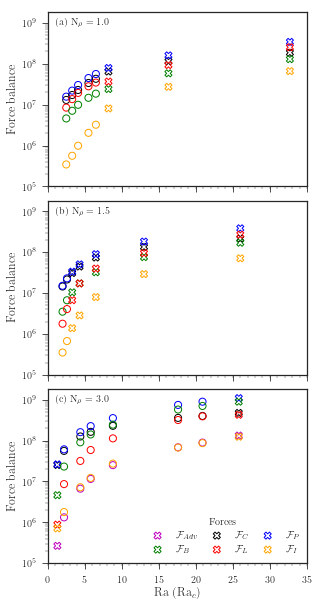

In [6]:
from mpl_toolkits.axes_grid1 import AxesGrid
nrows = 3
ncols = 1
dx = 4; dy = 2
fig = P.figure(figsize=(6,9))
grid = AxesGrid(fig, 111,
                nrows_ncols=(nrows, ncols),
                axes_pad=0.2,
                share_all = True,
                label_mode = 'L', # '1' or 'L'
                aspect = False
               )


shellGap = 0.4


########################################
grid[0].text(1., 1.e9, r'('+string.ascii_lowercase[0]+r') N$_\rho = 1.0$', horizontalalignment='left', va='center')

for j in range(len(rac[nrho == 1.0])):
    grid[0].scatter(rac[nrho == 1.0][j], CorRMS[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='k', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], PreRMS[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='b', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], BuoRMS[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='g', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], LFRMS[nrho == 1.0][j],   marker=symbol[nrho == 1.0][j], edgecolors='r', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], InerRMS[nrho == 1.0][j], marker=symbol[nrho == 1.0][j], edgecolors='orange', facecolors="none", s=50, lw=1.)




########################################
# this paper
grid[1].text(1., 1.e9, r'('+string.ascii_lowercase[1]+r') N$_\rho = 1.5$', horizontalalignment='left', va='center')

for j in range(len(rac[nrho == 1.5])):
    grid[1].scatter(rac[nrho == 1.5][j], CorRMS[nrho == 1.5][j],  marker=symbol[nrho == 1.5][j], edgecolors='k', facecolors="none", s=50, lw=1.)
    grid[1].scatter(rac[nrho == 1.5][j], PreRMS[nrho == 1.5][j],  marker=symbol[nrho == 1.5][j], edgecolors='b', facecolors="none", s=50, lw=1.)
    grid[1].scatter(rac[nrho == 1.5][j], BuoRMS[nrho == 1.5][j],  marker=symbol[nrho == 1.5][j], edgecolors='g', facecolors="none", s=50, lw=1.)  
    grid[1].scatter(rac[nrho == 1.5][j], LFRMS[nrho == 1.5][j],   marker=symbol[nrho == 1.5][j], edgecolors='r', facecolors="none", s=50, lw=1.)  
    grid[1].scatter(rac[nrho == 1.5][j], InerRMS[nrho == 1.5][j], marker=symbol[nrho == 1.5][j], edgecolors='orange', facecolors="none", s=50, lw=1.)   




########################################
grid[2].text(1., 1.e9, r'('+string.ascii_lowercase[2]+r') N$_\rho = 3.0$', horizontalalignment='left', va='center')
for j in range(len(rac[nrho == 3.0])):
    l0 = grid[2].scatter(rac[nrho == 3.0][j], AdvRMS[nrho == 3.0][j],  marker=symbol[nrho == 3.0][j], edgecolors='m', facecolors="none", s=50, lw=1.)
    l1 = grid[2].scatter(rac[nrho == 3.0][j], CorRMS[nrho == 3.0][j],  marker=symbol[nrho == 3.0][j], edgecolors='k', facecolors="none", s=50, lw=1.)
    l2 = grid[2].scatter(rac[nrho == 3.0][j], PreRMS[nrho == 3.0][j],  marker=symbol[nrho == 3.0][j], edgecolors='b', facecolors="none", s=50, lw=1.)
    l3 = grid[2].scatter(rac[nrho == 3.0][j], BuoRMS[nrho == 3.0][j],  marker=symbol[nrho == 3.0][j], edgecolors='g', facecolors="none", s=50, lw=1.)
    l4 = grid[2].scatter(rac[nrho == 3.0][j], LFRMS[nrho == 3.0][j],   marker=symbol[nrho == 3.0][j], edgecolors='r', facecolors="none", s=50, lw=1.)
    l5 = grid[2].scatter(rac[nrho == 3.0][j], InerRMS[nrho == 3.0][j], marker=symbol[nrho == 3.0][j], edgecolors='orange', facecolors="none", s=50, lw=1.)

leg1 = grid[2].legend((l0, l3, l1, l4, l2, l5), (r'$\mathcal{F}_{Adv}$', r'$\mathcal{F}_{B}$', r'$\mathcal{F}_{C}$', 
                                                 r'$\mathcal{F}_{L}$', r'$\mathcal{F}_{P}$', r'$\mathcal{F}_{I}$'), 
                      ncol=3, loc='lower right', title='Forces', fontsize='medium', columnspacing=1.0)



    
grid[2].set_xlabel(r'Ra (Ra$_c$)')
for i in range(nrows):
    grid[i].set_ylabel(r'Force balance')

grid[1].xaxis.set_minor_locator(MultipleLocator(1.))
grid[1].xaxis.set_major_locator(MultipleLocator(5.))

grid[2].set_xlim((0.,35.))
grid[2].set_ylim((1.e5,1.8e9))


grid[0].set_yscale('log')

pad = 0.05 # Padding around the edge of the figurea
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.5*ypad, bottom=ypad) 

os.chdir(FIGS_DIR)
P.savefig('FBrmsRac.pdf', dpi=60, bbox_inches='tight')
P.show()

## Force contributions at the integral scale $\ell_{peak}$

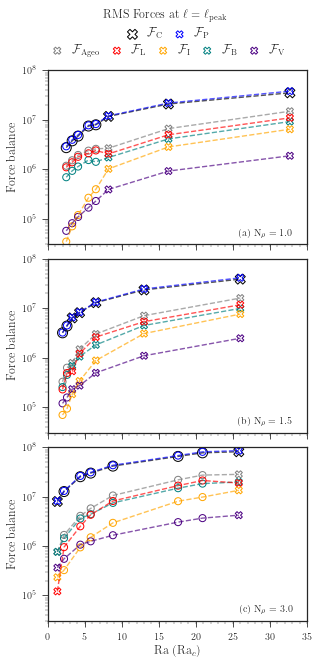

In [7]:
nrows = 3
ncols = 1
dx = 4; dy = 2
fig = P.figure(figsize=(6,9))
grid = AxesGrid(fig, 111,
                nrows_ncols=(nrows, ncols),
                axes_pad=0.2,
                share_all = True,
                label_mode = 'L', # '1' or 'L'
                aspect = False
               )


shellGap = 0.4



########################################
grid[0].text(33., 5.e4, r'('+string.ascii_lowercase[0]+r') N$_\rho = 1.0$', horizontalalignment='right', va='center')

for j in range(len(rac[nrho == 1.0])):
    grid[0].scatter(rac[nrho == 1.0][j], GeoLpol[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='gray', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], CorLpol[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='k', facecolors="none", s=100, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], PreLpol[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='b', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], BuoLpol[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='teal', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], LFLpol[nrho == 1.0][j],   marker=symbol[nrho == 1.0][j], edgecolors='red', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], InerLpol[nrho == 1.0][j], marker=symbol[nrho == 1.0][j], edgecolors='orange', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], DifLpol[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='indigo', facecolors="none", s=50, lw=1.)





########################################
grid[1].text(33., 5.e4, r'('+string.ascii_lowercase[1]+r') N$_\rho = 1.5$', horizontalalignment='right', va='center')

for j in range(len(rac[nrho == 1.5])):
    grid[1].scatter(rac[nrho == 1.5][j], GeoLpol[nrho == 1.5][j],  marker=symbol[nrho == 1.5][j], edgecolors='gray', facecolors="none", s=50, lw=1.)
    grid[1].scatter(rac[nrho == 1.5][j], CorLpol[nrho == 1.5][j],  marker=symbol[nrho == 1.5][j], edgecolors='k', facecolors="none", s=100, lw=1.)
    grid[1].scatter(rac[nrho == 1.5][j], PreLpol[nrho == 1.5][j],  marker=symbol[nrho == 1.5][j], edgecolors='b', facecolors="none", s=50, lw=1.)
    grid[1].scatter(rac[nrho == 1.5][j], BuoLpol[nrho == 1.5][j],  marker=symbol[nrho == 1.5][j], edgecolors='teal', facecolors="none", s=50, lw=1.)  
    grid[1].scatter(rac[nrho == 1.5][j], LFLpol[nrho == 1.5][j],   marker=symbol[nrho == 1.5][j], edgecolors='red', facecolors="none", s=50, lw=1.)  
    grid[1].scatter(rac[nrho == 1.5][j], InerLpol[nrho == 1.5][j], marker=symbol[nrho == 1.5][j], edgecolors='orange', facecolors="none", s=50, lw=1.)   
    grid[1].scatter(rac[nrho == 1.5][j], DifLpol[nrho == 1.5][j], marker=symbol[nrho == 1.5][j], edgecolors='indigo', facecolors="none", s=50, lw=1.)   


########################################
grid[2].text(33., 5.e4, r'('+string.ascii_lowercase[2]+r') N$_\rho = 3.0$', horizontalalignment='right', va='center')
for j in range(len(rac[nrho == 3.0])):
    l0 = grid[2].scatter(rac[nrho == 3.0][j], GeoLpol[nrho == 3.0][j],  marker=symbol[nrho == 3.0][j], edgecolors='gray', facecolors="none", s=50, lw=1.)
    l1 = grid[2].scatter(rac[nrho == 3.0][j], CorLpol[nrho == 3.0][j],  marker=symbol[nrho == 3.0][j], edgecolors='k', facecolors="none", s=100, lw=1.)
    l2 = grid[2].scatter(rac[nrho == 3.0][j], PreLpol[nrho == 3.0][j],  marker=symbol[nrho == 3.0][j], edgecolors='b', facecolors="none", s=50, lw=1.)
    l3 = grid[2].scatter(rac[nrho == 3.0][j], BuoLpol[nrho == 3.0][j],  marker=symbol[nrho == 3.0][j], edgecolors='teal', facecolors="none", s=50, lw=1.)
    l4 = grid[2].scatter(rac[nrho == 3.0][j], LFLpol[nrho == 3.0][j],   marker=symbol[nrho == 3.0][j], edgecolors='red', facecolors="none", s=50, lw=1.)
    l5 = grid[2].scatter(rac[nrho == 3.0][j], InerLpol[nrho == 3.0][j], marker=symbol[nrho == 3.0][j], edgecolors='orange', facecolors="none", s=50, lw=1.)
    l6 = grid[2].scatter(rac[nrho == 3.0][j], DifLpol[nrho == 3.0][j], marker=symbol[nrho == 3.0][j], edgecolors='indigo', facecolors="none", s=50, lw=1.)


leg1 = grid[0].legend((l1, l2), (r'$\mathcal{F}_\mathrm{C}$', r'$\mathcal{F}_\mathrm{P}$'), ncol=2, 
               bbox_to_anchor=[.45, 1.11], title=r'RMS Forces at $\ell = \ell_\mathrm{peak}$', 
                    fontsize='large', loc='lower center', 
               columnspacing=.5, handletextpad=0.2)    

grid[0].add_artist(leg1)

leg2 = grid[0].legend((l0, l4, l5, l3, l6), (r'$\mathcal{F}_\mathrm{Ageo}$',
                                                 r'$\mathcal{F}_\mathrm{L}$', r'$\mathcal{F}_\mathrm{I}$', 
                                                 r'$\mathcal{F}_\mathrm{B}$', r'$\mathcal{F}_\mathrm{V}$'), 
                      ncol=5, loc='lower center', fontsize='large',  bbox_to_anchor=[0.45, 1.01], 
                      columnspacing=.5, scatteryoffsets=[0.5], handletextpad=0.2, shadow=True)


P.setp(leg1.get_title(),fontsize='large')
#P.setp(leg2.get_title(),fontsize='large')


if True:
    grid[0].plot(rac[nrho == 1.0], GeoLpol[nrho == 1.0],  marker=" ", c='gray', ls='--', alpha=2./3)
    grid[0].plot(rac[nrho == 1.0], CorLpol[nrho == 1.0],  marker=" ", c='k', ls='--', alpha=2./3)
    grid[0].plot(rac[nrho == 1.0], PreLpol[nrho == 1.0],  marker=" ", c='b', ls='--', alpha=2./3)
    grid[0].plot(rac[nrho == 1.0], BuoLpol[nrho == 1.0],  marker=" ", c='teal', ls='--', alpha=2./3)
    grid[0].plot(rac[nrho == 1.0], LFLpol[nrho == 1.0],  marker=" ", c='red', ls='--', alpha=2./3)
    grid[0].plot(rac[nrho == 1.0], InerLpol[nrho == 1.0],  marker=" ", c='orange', ls='--', alpha=2./3)
    grid[0].plot(rac[nrho == 1.0], DifLpol[nrho == 1.0],  marker=" ", c='indigo', ls='--', alpha=2./3)


    grid[1].plot(rac[nrho == 1.5], GeoLpol[nrho == 1.5],  marker=" ", c='gray', ls='--', alpha=2./3)
    grid[1].plot(rac[nrho == 1.5], CorLpol[nrho == 1.5],  marker=" ", c='k', ls='--', alpha=2./3)
    grid[1].plot(rac[nrho == 1.5], PreLpol[nrho == 1.5],  marker=" ", c='b', ls='--', alpha=2./3)
    grid[1].plot(rac[nrho == 1.5], BuoLpol[nrho == 1.5],  marker=" ", c='teal', ls='--', alpha=2./3)
    grid[1].plot(rac[nrho == 1.5], LFLpol[nrho == 1.5],  marker=" ", c='red', ls='--', alpha=2./3)
    grid[1].plot(rac[nrho == 1.5], InerLpol[nrho == 1.5],  marker=" ", c='orange', ls='--', alpha=2./3)
    grid[1].plot(rac[nrho == 1.5], DifLpol[nrho == 1.5],  marker=" ", c='indigo', ls='--', alpha=2./3)
    
    grid[2].plot(rac[nrho == 3.0], GeoLpol[nrho == 3.0],  marker=" ", c='gray', ls='--', alpha=2./3)
    grid[2].plot(rac[nrho == 3.0], CorLpol[nrho == 3.0],  marker=" ", c='k', ls='--', alpha=2./3)
    grid[2].plot(rac[nrho == 3.0], PreLpol[nrho == 3.0],  marker=" ", c='b', ls='--', alpha=2./3)
    grid[2].plot(rac[nrho == 3.0], BuoLpol[nrho == 3.0],  marker=" ", c='teal', ls='--', alpha=2./3)
    grid[2].plot(rac[nrho == 3.0], LFLpol[nrho == 3.0],  marker=" ", c='red', ls='--', alpha=2./3)
    grid[2].plot(rac[nrho == 3.0], InerLpol[nrho == 3.0],  marker=" ", c='orange', ls='--', alpha=2./3)
    grid[2].plot(rac[nrho == 3.0], DifLpol[nrho == 3.0],  marker=" ", c='indigo', ls='--', alpha=2./3)
    
grid[2].set_xlabel(r'Ra (Ra$_c$)')
for i in range(nrows):
    grid[i].set_ylabel(r'Force balance')

grid[1].xaxis.set_minor_locator(MultipleLocator(1.))
grid[1].xaxis.set_major_locator(MultipleLocator(5.))

grid[2].set_xlim((0.,35.))
grid[2].set_ylim((3.e4,1.e8))


grid[0].set_yscale('log')

pad = 0.05 # Padding around the edge of the figurea
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.5*ypad, bottom=ypad)

os.chdir(FIGS_DIR)
P.savefig('FBLpolRac.pdf', dpi=60, bbox_inches='tight')
P.show()

## Dipolarity vs FI/FL for both methods

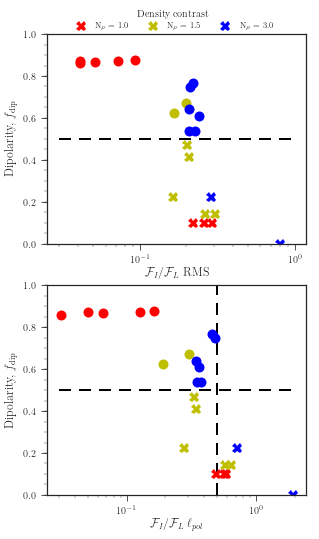

In [8]:
nrows = 2
ncols = 1
logGraph = True

fig, grid = P.subplots(nrows, ncols, figsize=(6,8), sharey=True)


if guides:
    grid[0].plot(N.linspace(0.03,1.,20), (.5)*N.ones(20), 'k--', dashes=[6,4], lw=2.)
    grid[1].plot(N.linspace(0.03,2.,20), (.5)*N.ones(20), 'k--', dashes=[6,4], lw=2.)
    grid[1].plot((.5)*N.ones(20), N.linspace(0,1.0,20), 'k--', dashes=[6,4], lw=2.)    
    
for i in range(len(InerLorRatioRMS[nrho == 1.0])):
    l1, = grid[0].plot(InerLorRatioRMS[nrho == 1.0][i], dipl11[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=ms, linestyle='')
for i in range(len(InerLorRatioRMS[nrho == 1.5])):
    l2, = grid[0].plot(InerLorRatioRMS[nrho == 1.5][i], dipl11[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=ms, linestyle='')
for i in range(len(InerLorRatioRMS[nrho == 3.0])):
    l3, = grid[0].plot(InerLorRatioRMS[nrho == 3.0][i], dipl11[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=ms, linestyle='')
leg1 = grid[0].legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), ncol=3, bbox_to_anchor=[0.9, 1.15], title='Density contrast')


for i in range(len(InerLorRatioLpol[nrho == 1.0])):
    l1, = grid[1].plot(InerLorRatioLpol[nrho == 1.0][i], dipl11[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=ms, linestyle='')
for i in range(len(InerLorRatioLpol[nrho == 1.5])):
    l2, = grid[1].plot(InerLorRatioLpol[nrho == 1.5][i], dipl11[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=ms, linestyle='')
for i in range(len(InerLorRatioLpol[nrho == 3.0])):
    l3, = grid[1].plot(InerLorRatioLpol[nrho == 3.0][i], dipl11[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=ms, linestyle='')


    
grid[1].set_ylim((0.,1.))



grid[0].set_xlabel(r'$\mathcal{F}_{I}/\mathcal{F}_{L}$ RMS')

grid[1].set_xlabel(r'$\mathcal{F}_{I}/\mathcal{F}_{L} \; \ell_{pol}$ ')
        
if logGraph:
    grid[0].set_xscale('log')
    grid[1].set_xscale('log')
else:
    grid[0].xaxis.set_minor_locator(MultipleLocator(.02))
    grid[0].xaxis.set_major_locator(MultipleLocator(.1))  
    grid[1].xaxis.set_minor_locator(MultipleLocator(.05))
    grid[1].xaxis.set_major_locator(MultipleLocator(.25))
    
    
grid[0].set_ylabel(r'Dipolarity, $f_\mathrm{dip}$')
grid[1].set_ylabel(r'Dipolarity, $f_\mathrm{dip}$')

grid[1].yaxis.set_minor_locator(MultipleLocator(.05))
grid[1].yaxis.set_major_locator(MultipleLocator(.2))

pad = 0.05 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.6*ypad, bottom=1.4*ypad)

os.chdir(FIGS_DIR)
P.show()

## Dipolarity vs forces at $\ell_{peak}$ (paper choice)

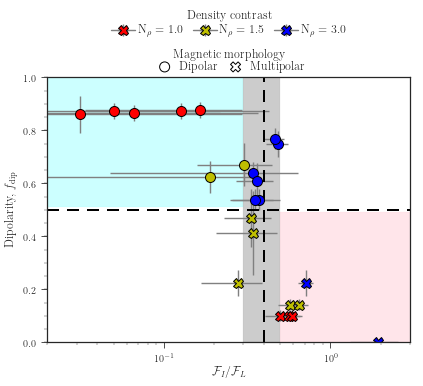

In [9]:
nrows = 1
ncols = 1
logGraph = True

fig, grid = P.subplots(nrows, ncols, figsize=(6,4), sharey=True)


if guides:
    grid.plot((.4)*N.ones(20), N.linspace(0.0,1.0,20), 'k--', dashes=[6,4], lw=2.)
    grid.plot(N.linspace(0.02,3.1,20), (.5)*N.ones(20), 'k--', dashes=[6,4], lw=2.)
    

grid.fill_between(N.linspace(1.e-4,0.3, 20), 0.51*N.ones(20), 1.*N.ones(20), color='cyan', alpha=1./5)
grid.fill_between(N.linspace(.5, 1.e3, 20), 0.0*N.ones(20), .49*N.ones(20), color='pink', alpha=2./5)

grid.fill_between(N.linspace(0.3, .5, 20), 0.0*N.ones(20), 1.*N.ones(20), color='gray', alpha=2./5)


for i in range(len(InerLorRatioLpol[nrho == 1.0])):
    l1 = grid.errorbar(InerLorRatioLpol[nrho == 1.0][i], dipl11[nrho == 1.0][i], yerr=dipl11_std[nrho == 1.0][i], xerr=IL_std[nrho == 1.0][i], 
                       marker=symbol[nrho == 1.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.0][i])
for i in range(len(InerLorRatioLpol[nrho == 1.5])):
    l2 = grid.errorbar(InerLorRatioLpol[nrho == 1.5][i], dipl11[nrho == 1.5][i], yerr=dipl11_std[nrho == 1.5][i], xerr=IL_std[nrho == 1.5][i], 
                       marker=symbol[nrho == 1.5][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.5][i])
for i in range(len(InerLorRatioLpol[nrho == 3.0])):
    l3 = grid.errorbar(InerLorRatioLpol[nrho == 3.0][i], dipl11[nrho == 3.0][i], yerr=dipl11_std[nrho == 3.0][i], xerr=IL_std[nrho == 3.0][i], 
                       marker=symbol[nrho == 3.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 3.0][i])

#leg1 = grid.legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), 
#                         ncol=3, bbox_to_anchor=[0.5, 1.1], title='Density contrast', 
#                         loc='center', columnspacing=.8, handletextpad=0.2,  fontsize='large')


#P.setp(leg1.get_title(),fontsize='large')



l4 = grid.scatter(0., 1.1, marker='o', edgecolors='black', facecolors="none", s=100, lw=1.)
l5 = grid.scatter(0., 1.1, marker='X', edgecolors='black', facecolors="none", s=100, lw=1.)
first_legend = grid.legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), 
                         ncol=3, bbox_to_anchor=[0.5, 1.2], title='Density contrast',labelspacing=0.3,
                         loc='center', columnspacing=.8, handletextpad=0.2,  fontsize='large')
d = first_legend.get_children()[0].get_children()[1].get_children()[0].get_children()[0].get_children()[0]
e = first_legend.get_children()[0].get_children()[1].get_children()[1].get_children()[0].get_children()[0]
f = first_legend.get_children()[0].get_children()[1].get_children()[2].get_children()[0].get_children()[0]
for a, b, c in zip(d.get_children(),e.get_children(), f.get_children()):
    a.set_color('gray')
    b.set_color('gray')
    c.set_color('gray')

ax2 = plt.gca().add_artist(first_legend)

leg2 = grid.legend((l4, l5), ('Dipolar', 'Multipolar'), ncol=2, 
                 bbox_to_anchor=[.5, 1.06], title='Magnetic morphology', 
                 loc='center', columnspacing=.5, handletextpad=0.2, fontsize='large',labelspacing=0.08)

P.setp(first_legend.get_title(),fontsize='large')
P.setp(leg2.get_title(),fontsize='large')

grid.set_ylim((0.,1.))

grid.set_xlabel(r'$\mathcal{F}_{I}/\mathcal{F}_{L}$')
        
if logGraph:
    grid.set_xscale('log')
    grid.set_xlim((0.02,3.))
else:
    grid.xaxis.set_minor_locator(MultipleLocator(.02))
    grid.xaxis.set_major_locator(MultipleLocator(.1))  
 
    
grid.set_ylabel(r'Dipolarity, $f_\mathrm{dip}$')

grid.yaxis.set_minor_locator(MultipleLocator(.05))
grid.yaxis.set_major_locator(MultipleLocator(.2))

pad = 0.02 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.6*ypad, bottom=1.4*ypad)

os.chdir(FIGS_DIR)
P.savefig('Dipolarity_FB.pdf', dpi=80, bbox_inches='tight')
P.show()

# Second order force balance
## Normalized by the unbalanced Ageostrophic force

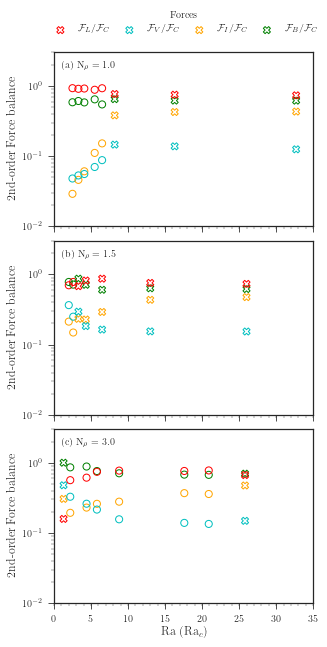

In [10]:
nrows = 3
ncols = 1
dx = 4; dy = 2
fig = P.figure(figsize=(6,9))
grid = AxesGrid(fig, 111,
                nrows_ncols=(nrows, ncols),
                axes_pad=0.2,
                share_all = True,
                label_mode = 'L', # '1' or 'L'
                aspect = False
               )


shellGap = 0.4



########################################
grid[0].text(1., 1.9, r'('+string.ascii_lowercase[0]+r') N$_\rho = 1.0$', horizontalalignment='left', va='center')

for j in range(len(rac[nrho == 1.0])):
    grid[0].scatter(rac[nrho == 1.0][j], BuoLpol[nrho == 1.0][j]/GeoLpol[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='g', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], LFLpol[nrho == 1.0][j]/GeoLpol[nrho == 1.0][j],   marker=symbol[nrho == 1.0][j], edgecolors='r', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], InerLpol[nrho == 1.0][j]/GeoLpol[nrho == 1.0][j], marker=symbol[nrho == 1.0][j], edgecolors='orange', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], DifLpol[nrho == 1.0][j]/GeoLpol[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='c', facecolors="none", s=50, lw=1.)





########################################
# this paper
grid[1].text(1., 1.9, r'('+string.ascii_lowercase[1]+r') N$_\rho = 1.5$', horizontalalignment='left', va='center')

for j in range(len(rac[nrho == 1.5])):
    grid[1].scatter(rac[nrho == 1.5][j], BuoLpol[nrho == 1.5][j]/GeoLpol[nrho == 1.5][j],  marker=symbol[nrho == 1.5][j], edgecolors='g', facecolors="none", s=50, lw=1.)  
    grid[1].scatter(rac[nrho == 1.5][j], LFLpol[nrho == 1.5][j]/GeoLpol[nrho == 1.5][j],   marker=symbol[nrho == 1.5][j], edgecolors='r', facecolors="none", s=50, lw=1.)  
    grid[1].scatter(rac[nrho == 1.5][j], InerLpol[nrho == 1.5][j]/GeoLpol[nrho == 1.5][j], marker=symbol[nrho == 1.5][j], edgecolors='orange', facecolors="none", s=50, lw=1.)   
    grid[1].scatter(rac[nrho == 1.5][j], DifLpol[nrho == 1.5][j]/GeoLpol[nrho == 1.5][j], marker=symbol[nrho == 1.5][j], edgecolors='c', facecolors="none", s=50, lw=1.)   





########################################
grid[2].text(1., 1.9, r'('+string.ascii_lowercase[2]+r') N$_\rho = 3.0$', horizontalalignment='left', va='center')
for j in range(len(rac[nrho == 3.0])):
    l3 = grid[2].scatter(rac[nrho == 3.0][j], BuoLpol[nrho == 3.0][j]/GeoLpol[nrho == 3.0][j],  marker=symbol[nrho == 3.0][j], edgecolors='g', facecolors="none", s=50, lw=1.)
    l4 = grid[2].scatter(rac[nrho == 3.0][j], LFLpol[nrho == 3.0][j]/GeoLpol[nrho == 3.0][j],   marker=symbol[nrho == 3.0][j], edgecolors='r', facecolors="none", s=50, lw=1.)
    l5 = grid[2].scatter(rac[nrho == 3.0][j], InerLpol[nrho == 3.0][j]/GeoLpol[nrho == 3.0][j], marker=symbol[nrho == 3.0][j], edgecolors='orange', facecolors="none", s=50, lw=1.)
    l6 = grid[2].scatter(rac[nrho == 3.0][j], DifLpol[nrho == 3.0][j]/GeoLpol[nrho == 3.0][j], marker=symbol[nrho == 3.0][j], edgecolors='c', facecolors="none", s=50, lw=1.)

leg1 = grid[0].legend((l4, l6, l5, l3), (r'$\mathcal{F}_{L}/\mathcal{F}_{C}$', r'$\mathcal{F}_{V}/\mathcal{F}_{C}$',
                                         r'$\mathcal{F}_{I}/\mathcal{F}_{C}$', r'$\mathcal{F}_{B}/\mathcal{F}_{C}$'), 
                      ncol=4, loc='lower center', title='Forces', fontsize='medium', 
                      bbox_to_anchor=[0.5, 1.05], columnspacing=1.0)




grid[2].set_xlabel(r'Ra (Ra$_c$)')
for i in range(nrows):
    grid[i].set_ylabel(r'2nd-order Force balance')

grid[1].xaxis.set_minor_locator(MultipleLocator(1.))
grid[1].xaxis.set_major_locator(MultipleLocator(5.))

grid[2].set_xlim((0.,35.))
grid[2].set_ylim((1.e-2,3.))


grid[0].set_yscale('log')

pad = 0.05 # Padding around the edge of the figurea
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.5*ypad, bottom=ypad)

os.chdir(FIGS_DIR)
P.savefig('SOBLpolRac.pdf', dpi=60, bbox_inches='tight')
P.show()

## Normalized by the Lorentz force

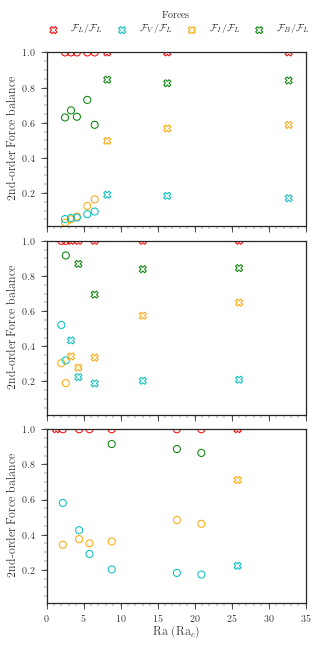

In [11]:
nrows = 3
ncols = 1
dx = 4; dy = 2
fig = P.figure(figsize=(6,9))
grid = AxesGrid(fig, 111,
                nrows_ncols=(nrows, ncols),
                axes_pad=0.2,
                share_all = True,
                label_mode = 'L', # '1' or 'L'
                aspect = False
               )


shellGap = 0.4



########################################
#grid[0].text(1., 1.9, r'('+string.ascii_lowercase[0]+r') N$_\rho = 1.0$', horizontalalignment='left', va='center')

for j in range(len(rac[nrho == 1.0])):
    grid[0].scatter(rac[nrho == 1.0][j], BuoLpol[nrho == 1.0][j]/LFLpol[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='g', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], LFLpol[nrho == 1.0][j]/LFLpol[nrho == 1.0][j],   marker=symbol[nrho == 1.0][j], edgecolors='r', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], InerLpol[nrho == 1.0][j]/LFLpol[nrho == 1.0][j], marker=symbol[nrho == 1.0][j], edgecolors='orange', facecolors="none", s=50, lw=1.)
    grid[0].scatter(rac[nrho == 1.0][j], DifLpol[nrho == 1.0][j]/LFLpol[nrho == 1.0][j],  marker=symbol[nrho == 1.0][j], edgecolors='c', facecolors="none", s=50, lw=1.)





########################################
# this paper
#grid[1].text(1., 1.9, r'('+string.ascii_lowercase[1]+r') N$_\rho = 1.5$', horizontalalignment='left', va='center')

for j in range(len(rac[nrho == 1.5])):
    grid[1].scatter(rac[nrho == 1.5][j], BuoLpol[nrho == 1.5][j]/LFLpol[nrho == 1.5][j],  marker=symbol[nrho == 1.5][j], edgecolors='g', facecolors="none", s=50, lw=1.)  
    grid[1].scatter(rac[nrho == 1.5][j], LFLpol[nrho == 1.5][j]/LFLpol[nrho == 1.5][j],   marker=symbol[nrho == 1.5][j], edgecolors='r', facecolors="none", s=50, lw=1.)  
    grid[1].scatter(rac[nrho == 1.5][j], InerLpol[nrho == 1.5][j]/LFLpol[nrho == 1.5][j], marker=symbol[nrho == 1.5][j], edgecolors='orange', facecolors="none", s=50, lw=1.)   
    grid[1].scatter(rac[nrho == 1.5][j], DifLpol[nrho == 1.5][j]/LFLpol[nrho == 1.5][j], marker=symbol[nrho == 1.5][j], edgecolors='c', facecolors="none", s=50, lw=1.)   





########################################
#grid[2].text(1., 1.9, r'('+string.ascii_lowercase[2]+r') N$_\rho = 3.0$', horizontalalignment='left', va='center')
for j in range(len(rac[nrho == 3.0])):
    l3 = grid[2].scatter(rac[nrho == 3.0][j], BuoLpol[nrho == 3.0][j]/LFLpol[nrho == 3.0][j],  marker=symbol[nrho == 3.0][j], edgecolors='g', facecolors="none", s=50, lw=1.)
    l4 = grid[2].scatter(rac[nrho == 3.0][j], LFLpol[nrho == 3.0][j]/LFLpol[nrho == 3.0][j],   marker=symbol[nrho == 3.0][j], edgecolors='r', facecolors="none", s=50, lw=1.)
    l5 = grid[2].scatter(rac[nrho == 3.0][j], InerLpol[nrho == 3.0][j]/LFLpol[nrho == 3.0][j], marker=symbol[nrho == 3.0][j], edgecolors='orange', facecolors="none", s=50, lw=1.)
    l6 = grid[2].scatter(rac[nrho == 3.0][j], DifLpol[nrho == 3.0][j]/LFLpol[nrho == 3.0][j], marker=symbol[nrho == 3.0][j], edgecolors='c', facecolors="none", s=50, lw=1.)

leg1 = grid[0].legend((l4, l6, l5, l3), (r'$\mathcal{F}_{L}/\mathcal{F}_{L}$', r'$\mathcal{F}_{V}/\mathcal{F}_{L}$',
                                         r'$\mathcal{F}_{I}/\mathcal{F}_{L}$', r'$\mathcal{F}_{B}/\mathcal{F}_{L}$'), 
                      ncol=4, loc='lower center', title='Forces', fontsize='medium', 
                      bbox_to_anchor=[0.5, 1.05], columnspacing=1.0)




grid[2].set_xlabel(r'Ra (Ra$_c$)')
for i in range(nrows):
    grid[i].set_ylabel(r'2nd-order Force balance')

grid[1].xaxis.set_minor_locator(MultipleLocator(1.))
grid[1].xaxis.set_major_locator(MultipleLocator(5.))
grid[1].yaxis.set_minor_locator(MultipleLocator(.05))

grid[2].set_xlim((0.,35.))
grid[2].set_ylim((1.e-2,1.))


#grid[0].set_yscale('log')

pad = 0.05 # Padding around the edge of the figurea
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.5*ypad, bottom=ypad)

P.show()

# Dipolarity vs energy fraction

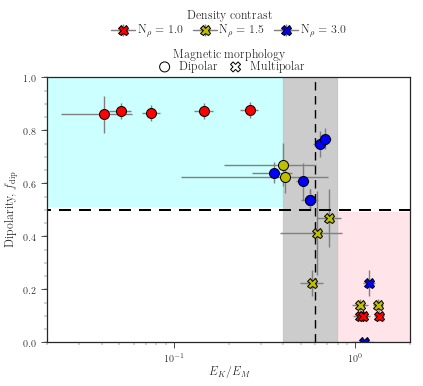

In [20]:
nrows = 1
ncols = 1
logGraph = True

fig, grid = P.subplots(nrows, ncols, figsize=(6,4), sharey=True)


if guides:
    grid.plot((.6)*N.ones(20), N.linspace(0.0,1.0,20), 'k--', dashes=[6,4])
    grid.plot(N.linspace(0,1000.,20), (.5)*N.ones(20), 'k--', dashes=[6,4], lw=2.)

grid.fill_between(N.linspace(1.e-4,0.4, 20), 0.51*N.ones(20), 1.*N.ones(20), color='cyan', alpha=1./5)
grid.fill_between(N.linspace(.8, 1.e3, 20), 0.0*N.ones(20), .49*N.ones(20), color='pink', alpha=2./5)

grid.fill_between(N.linspace(0.4, .8, 20), 0.0*N.ones(20), 1.*N.ones(20), color='gray', alpha=2./5)

    
for i in range(len(EkEm[nrho == 1.0])):
    l1 = grid.errorbar(EkEm[nrho == 1.0][i], dipl11[nrho == 1.0][i], yerr=dipl11_std[nrho == 1.0][i], xerr=EkEm_std[nrho == 1.0][i], 
                       marker=symbol[nrho == 1.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.0][i])
for i in range(len(EkEm[nrho == 1.5])):
    l2 = grid.errorbar(EkEm[nrho == 1.5][i], dipl11[nrho == 1.5][i], yerr=dipl11_std[nrho == 1.5][i], xerr=EkEm_std[nrho == 1.5][i], 
                       marker=symbol[nrho == 1.5][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.5][i])
for i in range(len(EkEm[nrho == 3.0])):
    l3 = grid.errorbar(EkEm[nrho == 3.0][i], dipl11[nrho == 3.0][i], yerr=dipl11_std[nrho == 3.0][i], xerr=EkEm_std[nrho == 3.0][i], 
                       marker=symbol[nrho == 3.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 3.0][i])

#leg1 = grid.legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), 
#                         ncol=3, bbox_to_anchor=[0.5, 1.1], title='Density contrast', 
#                         loc='center', columnspacing=.8, handletextpad=0.2,  fontsize='large')


l4 = grid.scatter(0., 1.1, marker='o', edgecolors='black', facecolors="none", s=100, lw=1.)
l5 = grid.scatter(0., 1.1, marker='X', edgecolors='black', facecolors="none", s=100, lw=1.)
first_legend = grid.legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), 
                         ncol=3, bbox_to_anchor=[0.5, 1.2], title='Density contrast',labelspacing=0.3,
                         loc='center', columnspacing=.8, handletextpad=0.2,  fontsize='large')
d = first_legend.get_children()[0].get_children()[1].get_children()[0].get_children()[0].get_children()[0]
e = first_legend.get_children()[0].get_children()[1].get_children()[1].get_children()[0].get_children()[0]
f = first_legend.get_children()[0].get_children()[1].get_children()[2].get_children()[0].get_children()[0]
for a, b, c in zip(d.get_children(),e.get_children(), f.get_children()):
    a.set_color('gray')
    b.set_color('gray')
    c.set_color('gray')

ax2 = plt.gca().add_artist(first_legend)

leg2 = grid.legend((l4, l5), ('Dipolar', 'Multipolar'), ncol=2, 
                 bbox_to_anchor=[.5, 1.06], title='Magnetic morphology', 
                 loc='center', columnspacing=.5, handletextpad=0.2, fontsize='large',labelspacing=0.08)

P.setp(first_legend.get_title(),fontsize='large')
P.setp(leg2.get_title(),fontsize='large')


grid.set_ylim((0.,1.))


grid.set_xlabel(r'$E_{K}/E_{M}$')
        
if logGraph:
    grid.set_xscale('log')
    grid.set_xlim((0.02,2.))
else:
    grid.xaxis.set_minor_locator(MultipleLocator(.02))
    grid.xaxis.set_major_locator(MultipleLocator(.1))  
 
    
grid.set_ylabel(r'Dipolarity, $f_\mathrm{dip}$')

grid.yaxis.set_minor_locator(MultipleLocator(.05))
grid.yaxis.set_major_locator(MultipleLocator(.2))

        
pad = 0.02 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.6*ypad, bottom=1.4*ypad)

os.chdir(FIGS_DIR)
P.savefig('Dipolarity_ekem.pdf', dpi=100, bbox_inches='tight')
P.show()

# Force spectra 

(800000.0, 1000000000.0)

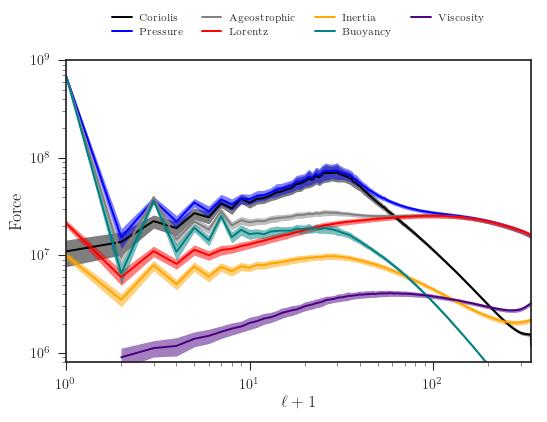

In [13]:
os.chdir("/Users/bzaire/rs-magic/nr3ra8ds21-fc")

gr = MagicSpectrum(field='dtVrms', ave=True, tag=25, iplot=False)

fig, ax = P.subplots(1, 1, figsize=(6,4), dpi=100)

ax.loglog(gr.index, gr.CorRms, c='k', label='Coriolis')
ax.loglog(gr.index, gr.PreRms, c='b', label='Pressure')
ax.loglog(gr.index, gr.geos,   c='gray', label='Ageostrophic')
ax.loglog(gr.index, gr.LFRms,  c='r', label='Lorentz')
ax.loglog(gr.index, gr.InerRms,c='orange', label='Inertia')
ax.loglog(gr.index, gr.BuoRms, c='teal', label='Buoyancy')
ax.loglog(gr.index, gr.DifRms, c='indigo', label='Viscosity')
ax.legend(ncol=4, fontsize='x-small', loc='lower center', bbox_to_anchor=[0.5, 1.05])


ax.fill_between(gr.index, gr.CorRms - gr.CorRms_SD, gr.CorRms + gr.CorRms_SD, color='k', alpha=1./2)
ax.fill_between(gr.index, gr.PreRms - gr.PreRms_SD, gr.PreRms + gr.PreRms_SD, color='b', alpha=1./2)
ax.fill_between(gr.index, gr.geos - gr.geos_SD, gr.geos + gr.geos_SD, color='gray', alpha=1./2)
ax.fill_between(gr.index, gr.LFRms - gr.LFRms_SD, gr.LFRms + gr.LFRms_SD, color='r', alpha=1./2)
ax.fill_between(gr.index, gr.InerRms - gr.InerRms_SD, gr.InerRms + gr.InerRms_SD, color='orange', alpha=1./2)
ax.fill_between(gr.index, gr.BuoRms - gr.BuoRms_SD, gr.BuoRms + gr.BuoRms_SD, color='teal', alpha=1./2)
ax.fill_between(gr.index, gr.DifRms - gr.DifRms_SD, gr.DifRms + gr.DifRms_SD, color='indigo', alpha=1./2)


ax.set_xlabel('$\ell+1$')
ax.set_xlim(gr.index.min(), gr.index.max())
ax.set_ylabel('Force')
ax.set_ylim(8.e5,1.e9)

(100000.0, 1000000000.0)

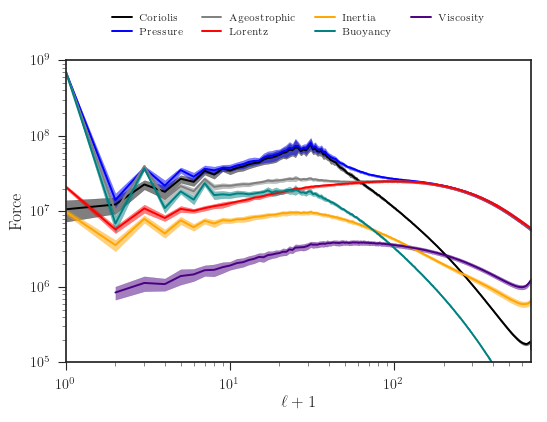

In [14]:
os.chdir("/Users/bzaire/rs-magic/nr3ra8ds21-fc")

gr = MagicSpectrum(field='dtVrms', ave=True, tag=26, iplot=False)

fig, ax = P.subplots(1, 1, figsize=(6,4), dpi=100)

ax.loglog(gr.index, gr.CorRms, c='k', label='Coriolis')
ax.loglog(gr.index, gr.PreRms, c='b', label='Pressure')
ax.loglog(gr.index, gr.geos,   c='gray', label='Ageostrophic')
ax.loglog(gr.index, gr.LFRms,  c='r', label='Lorentz')
ax.loglog(gr.index, gr.InerRms,c='orange', label='Inertia')
ax.loglog(gr.index, gr.BuoRms, c='teal', label='Buoyancy')
ax.loglog(gr.index, gr.DifRms, c='indigo', label='Viscosity')
ax.legend(ncol=4, fontsize='x-small', loc='lower center', bbox_to_anchor=[0.5, 1.05])


ax.fill_between(gr.index, gr.CorRms - gr.CorRms_SD, gr.CorRms + gr.CorRms_SD, color='k', alpha=1./2)
ax.fill_between(gr.index, gr.PreRms - gr.PreRms_SD, gr.PreRms + gr.PreRms_SD, color='b', alpha=1./2)
ax.fill_between(gr.index, gr.geos - gr.geos_SD, gr.geos + gr.geos_SD, color='gray', alpha=1./2)
ax.fill_between(gr.index, gr.LFRms - gr.LFRms_SD, gr.LFRms + gr.LFRms_SD, color='r', alpha=1./2)
ax.fill_between(gr.index, gr.InerRms - gr.InerRms_SD, gr.InerRms + gr.InerRms_SD, color='orange', alpha=1./2)
ax.fill_between(gr.index, gr.BuoRms - gr.BuoRms_SD, gr.BuoRms + gr.BuoRms_SD, color='teal', alpha=1./2)
ax.fill_between(gr.index, gr.DifRms - gr.DifRms_SD, gr.DifRms + gr.DifRms_SD, color='indigo', alpha=1./2)


ax.set_xlabel('$\ell+1$')
ax.set_xlim(gr.index.min(), gr.index.max())
ax.set_ylabel('Force')
ax.set_ylim(1.e5,1.e9)